<a href="https://colab.research.google.com/github/shivangsingh26/Customer_Lifetime_Analysis-CLV-/blob/main/Customer_Lifetime_Value(CLV)_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOTEBOOK TO FIND LIFETIME VALUE GIVEN BY A CUSTOMER TO A SHOP IN A PARTICULAR TIMEFRAME.

### **IMPORT LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
pip install xlrd #  FOR IMPORTING EXCEL FILES DIRECTLY.

In [4]:
!pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00


In [5]:
from lifetimes.plotting import *
from lifetimes.utils import *

# LOAD DATASET AND UNDERSTANDING THE DATA

In [6]:
df = pd.read_excel("/content/Online Retail.xlsx")

In [7]:
df.shape

(541909, 8)

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


SO WE CAN SEE THAT DATA IS FROM 1ST DECEMBER 2010 TO 9TH DECEMBER 2011

In [10]:
df.InvoiceNo.nunique()

25900

In [11]:
df.loc[df["CustomerID"].isnull()]['Quantity'].idxmax()

74614

In [12]:
df.loc[[df.Quantity.idxmax()]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [13]:
df.CustomerID.isna().sum()

135080

In [14]:
df["StockCode"].nunique()

4070

In [15]:
df["CustomerID"].nunique()

4372

We can see that we have 4372 different customers.

In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [18]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# DATA PREPROCESSING

In [19]:
df["InvoiceDate"] = pd.to_datetime(df['InvoiceDate']).dt.date

FIRST CONVERTING INVOICE DATE COLOUMN TO DATETIME OBJECT

AND WE ARE ONLY INTERESTED IN THE DATE COMPONENT SO EXTRACTING THAT USING .dt.date

In [20]:
df = df[pd.notnull(df['CustomerID'])]

We have considered only those customers whose CustomerID is available.

In [21]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

We can see that now we dont have any null values.

In [22]:
df = df[df['Quantity'] > 0]

We only consider those rows where something is bought ie quantity > 0

NOW WE WILL DEFINE A NEW COLOUMN SALES WHICH WILL DEFINE THE TOTAL SALES OF A PRODUCT.

In [23]:
df["Sales"] = df['Quantity'] * df['UnitPrice']

NOW WE DEFINE THE COLOUMNS WE ARE INTERESTED IN.

THESE ARE CUSTOMERID,INVOICEDATE , SALES

In [24]:
cols_of_interest = ['CustomerID' , 'InvoiceDate' , 'Sales']

df = df[cols_of_interest]

In [25]:
df.head()

,CustomerID,InvoiceDate,Sales
0,17850.0,2010-12-01,15.30
1,17850.0,2010-12-01,20.34
2,17850.0,2010-12-01,22.00
3,17850.0,2010-12-01,20.34
4,17850.0,2010-12-01,20.34


LETS FIND THE START AND END DATE OF SALES. AND REMAINING IMPORTANT INFORMATION.

In [26]:
print("Number of unique Customers : " , df.CustomerID.nunique())
print("\n--------------------------------------")
print(df.describe())
print("\n--------------------------------------")
print("START DATE : ",df['InvoiceDate'].min())
print("END DATE : ",df['InvoiceDate'].max())

Number of unique Customers :  4339

--------------------------------------
          CustomerID          Sales
count  397924.000000  397924.000000
mean    15294.315171      22.394749
std      1713.169877     309.055588
min     12346.000000       0.000000
25%     13969.000000       4.680000
50%     15159.000000      11.800000
75%     16795.000000      19.800000
max     18287.000000  168469.600000

--------------------------------------
START DATE :  2010-12-01
END DATE :  2011-12-09


# CLV MODEL

Now in order to build a CLV Model we would require 3 components

1) Frequency - It represents the number of repeat purchases the customer has made.

ie total number of purchases -1

2) T - It represents the age of customer in whatever units chosen(daily, in our case).

Hence it is equal to duration between customer's first purchase and the end of the period under study.

3)Recency - Age of customer when they made their most recent purchases.

This is equal to duration b/w a customer's first purchase and their latest purchase.(If it is their first purchase then recency is zero)

In [27]:
#NOW LETS CALCULATE FREQENCY,T,RECENCY VALUES
#We need to specify sales as a monetary value and observation period end as the last date.
#We use the below function
data = summary_data_from_transaction_data(df, "CustomerID",
                                          'InvoiceDate',
                                          monetary_value_col = 'Sales',
                                          observation_period_end = '2011-12-9')

In [28]:
data.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000


NOW PRINTING ALL THE INSIGHTS WE GET THE COMPONENTS

In [29]:
print("Insights on Frequency")
print("-------------------------------------")
print("Frequency min : ", data['frequency'].min())
print("Frequency max : ", data['frequency'].max())
print("Frequency avg : ", data['frequency'].mean())

print("\nInsights on Recency")
print("-------------------------------------")
print("Recency min : ", data['recency'].min())
print("Recency max : ", data['recency'].max())
print("Recency avg : ", data['recency'].mean())

print("\nInsights on Duration of Customer(T)")
print("-------------------------------------")
print("T min : ", data['T'].min())
print("T max : ", data['T'].max())
print("T avg : ", data['T'].mean())

print("\nInsights on Monetary Value") # Monetary value is Total sales of each product here
print("-------------------------------------")
print("Monetary Value Min : ", data['monetary_value'].min())
print("Monetary Value Max : ", data['monetary_value'].max())
print("Monetary Value Avg : ", data['monetary_value'].mean())


Insights on Frequency
-------------------------------------
Frequency min :  0.0
Frequency max :  131.0
Frequency avg :  2.8640239686563724

Insights on Recency
-------------------------------------
Recency min :  0.0
Recency max :  373.0
Recency avg :  130.74141507259736

Insights on Duration of Customer(T)
-------------------------------------
T min :  0.0
T max :  373.0
T avg :  222.78289928554966

Insights on Monetary Value
-------------------------------------
Monetary Value Min :  0.0
Monetary Value Max :  168469.6
Monetary Value Avg :  306.94416755414875


Now lets also check the distribution of these features.

In [30]:
data['frequency'].size

4339

In [31]:
print("Percentage of customers having frequency values as 0 : ",sum(data["frequency"] == 0)/data["frequency"].size*100)
print("Percentage of customers having recency values as 0 : ",sum(data["recency"] == 0)/data["recency"].size*100)
print("Percentage of customers having Monetary values as 0 : ",sum(data["monetary_value"] == 0)/data["monetary_value"].size*100)

Percentage of customers having frequency values as 0 :  35.69946992394561
Percentage of customers having recency values as 0 :  35.69946992394561
Percentage of customers having Monetary values as 0 :  35.69946992394561


NOW LETS PLOT THE DISTRIBUTION FOR THESE FREQUENCY,RECENCY AND MONETARY VALUES. FOR OUR RFM ANALYSIS


<ipython-input-32-7f52d294ddd3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['monetary_value'] , color = 'black')
<ipython-input-32-7f52d294ddd3>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['recency'] , color = 'black')
<ipython-input-32-7f52d294ddd3>:15: UserWarning: 

`dist

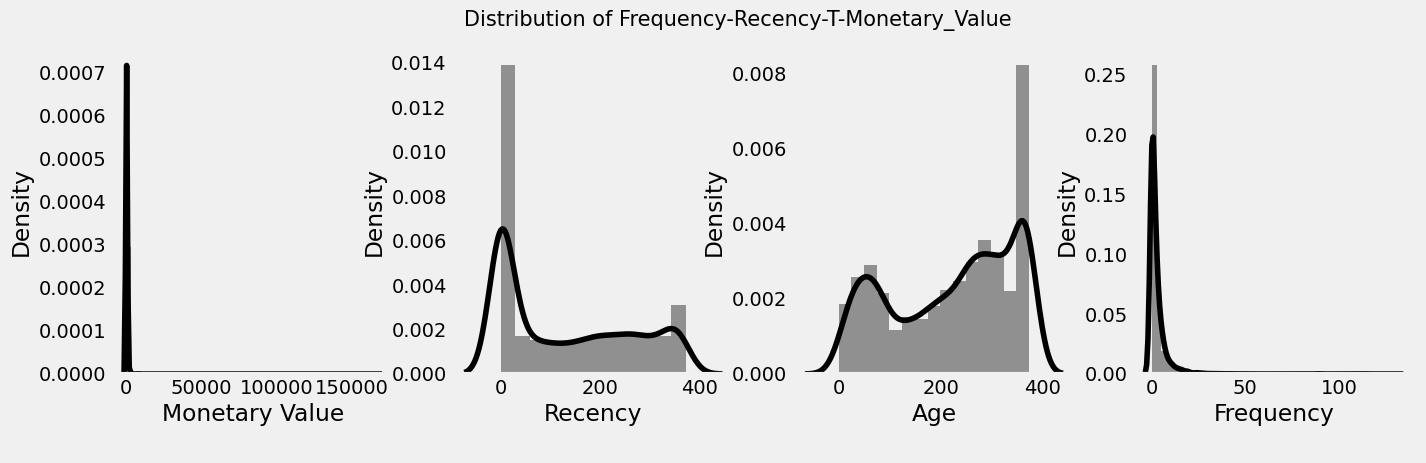

In [32]:
plt.rcParams['figure.figsize'] = (15,4)
plt.style.use('fivethirtyeight')

plt.subplot(1,4,1)
sns.distplot(data['monetary_value'] , color = 'black')
plt.xlabel('Monetary Value\n')
plt.grid()

plt.subplot(1,4,2)
sns.distplot(data['recency'] , color = 'black')
plt.xlabel('Recency\n')
plt.grid()

plt.subplot(1,4,3)
sns.distplot(data['T'] , color = 'black')
plt.xlabel('Age\n')
plt.grid()

plt.subplot(1,4,4)
sns.distplot(data['frequency'] , color = 'black')
plt.xlabel('Frequency\n')
plt.grid()

plt.suptitle('Distribution of Frequency-Recency-T-Monetary_Value \n', fontsize = 15)
plt.show()

From the distribution we can see that Monetary Value and Frequency Values are highly skewed.

And Recency and Age values seem to be moderately skewed

# Frequency and Recency Analysis

Frequency/Recency Matrix computes the expected number of transactions an artificial customer is going to make in the next time period.(ie it predicts future behaviors of customers)

We use the BG-NBD (Beta geometric or Negative Bionomial Distribution)Model for this frequency/recency analysis.



In [33]:
from lifetimes import BetaGeoFitter

#Making a Beta Geo Fitter Model with Penalizer Coefficient as 0.1
bgf = BetaGeoFitter(penalizer_coef = 0.1)

#Feeding the Model with Frequency , Recency and Duration
bgf.fit(data['frequency'], data['recency'], data['T'])

#Lets check the model parameters
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 49.41, b: 0.00, r: 0.59>


Now we will plot the frequency recency matrix

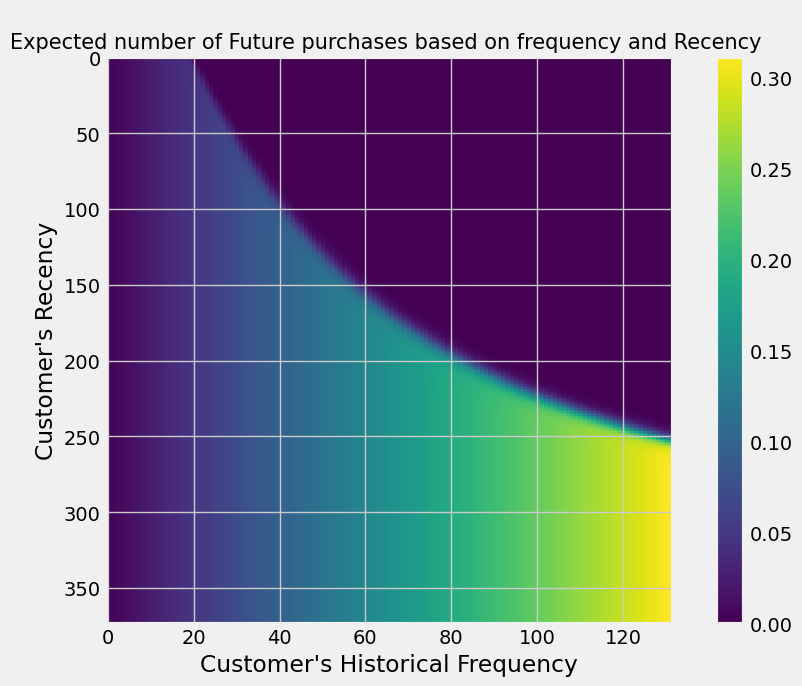

In [35]:
from lifetimes.plotting import plot_frequency_recency_matrix

plt.rcParams['figure.figsize'] = (10,7) # Runtime configurations parameters
# used to explicitly define figure shapes, font etc for the plots.

plot_frequency_recency_matrix(bgf)

plt.title("\nExpected number of Future purchases based on frequency and Recency ",fontsize = 15)
plt.show()

The bottom right yellow region shows the customers who have purchased a lot or have purchased recently(This will relatively be a small number)

The customers who have have not purchased recently or who are not purchasing a lot will be always very high.

# Estimating Customer's Liveliness

Using the BG-NBD Model we can also predict the liveliness of a customer.

ie whether a customer is alive or dead

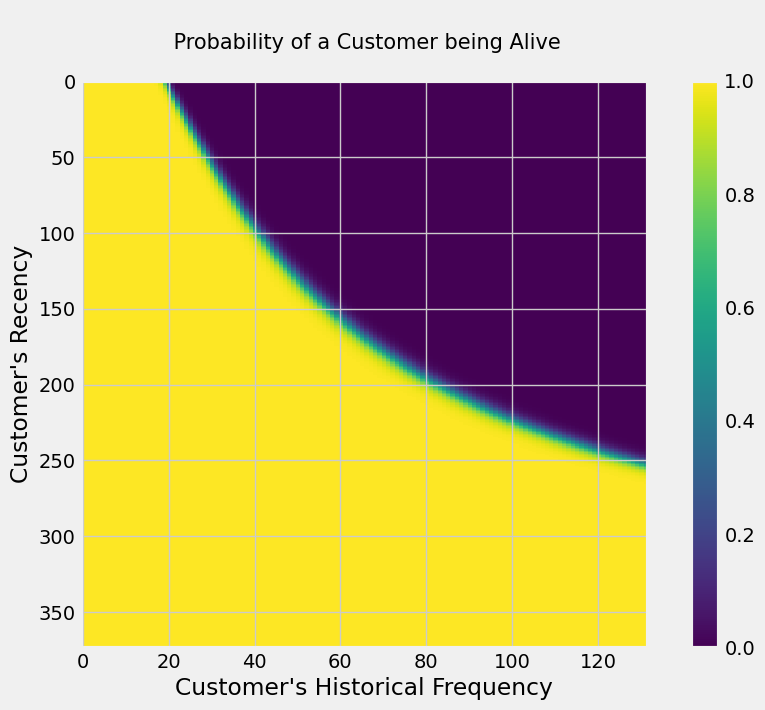

In [36]:
from lifetimes.plotting import plot_probability_alive_matrix

plt.rcParams['figure.figsize'] = (10,7)

#Lets plot the probability of alive matrix now
plot_probability_alive_matrix(bgf)
plt.title("\n Probability of a Customer being Alive\n",fontsize = 15)
plt.show()

We can see the people who have not purchased recently have a low probability of being alive

This model also has a method we can use to predict a customer's expected purchases in the next period using their history

In [37]:
#Prediction of purchases of the customers for the future

#We will set the time value as 1 and again use a predefined function from beta geo filter
#We are using the conditional expected no. of purchases upto time function for doing this.

t =1
data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t,data['frequency'],data['recency'],data['T'])

In [39]:
#Now lets check for the highest probabilities of predicted_purchases coloumn in the dataset
data.sort_values(by = 'predicted_purchases', ascending = False).head()
# there is no descending function here remember that

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
14911.0,131.0,372.0,373.0,1093.661679,0.311527
12748.0,113.0,373.0,373.0,298.360885,0.268915
17841.0,111.0,372.0,373.0,364.452162,0.264180
15311.0,89.0,373.0,373.0,677.729438,0.212099
14606.0,88.0,372.0,373.0,135.890114,0.209731


So  BG-NBD Model  says that these five customers are the company's best and most loyal customers.

# Testing the Accuracy of our Model

First lets plot the period_transactions(It plots graph between actual vs model results)

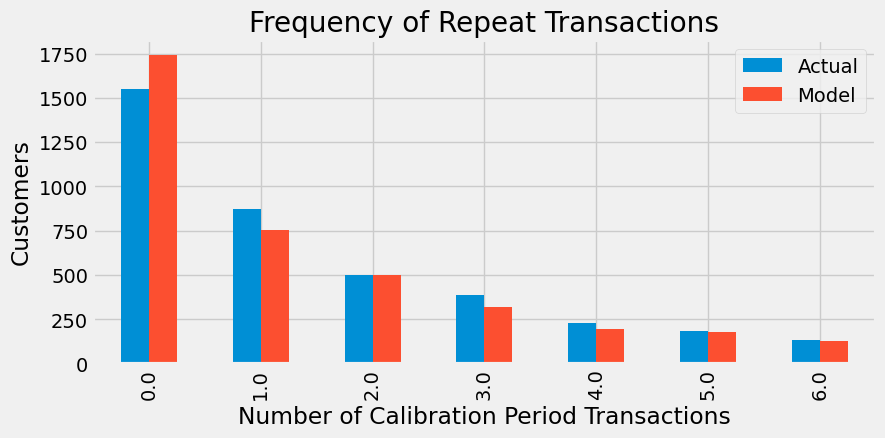

In [40]:
from lifetimes.plotting import plot_period_transactions

#Importing plot period transactions
plt.rcParams['figure.figsize'] = (9,4)
plot_period_transactions(bgf)
plt.show()

We can see that the actual and the model predicted results are very close

Now we partition our dataset into calibration(in-sample) and holdout datasets(holdout) which is similar to train and test data.

In [41]:
from lifetimes.utils import calibration_and_holdout_data

#Lets create the calibration and holdout dataset
summary_cal_holdout = calibration_and_holdout_data(df, 'CustomerID', 'InvoiceDate',
                                                   calibration_period_end="2011-06-08",
                                                   observation_period_end="2011-12-9")

In [42]:
summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346.0,0.0,0.0,141.0,0.0,184.0
12347.0,2.0,121.0,183.0,4.0,184.0
12348.0,2.0,110.0,174.0,1.0,184.0
12350.0,0.0,0.0,126.0,0.0,184.0
12352.0,3.0,34.0,112.0,3.0,184.0


Now lets plot both the datasets

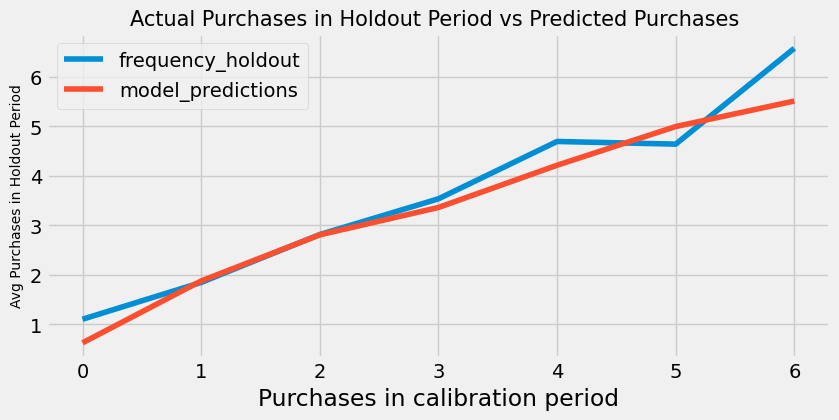

In [43]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
import warnings
warnings.filterwarnings('ignore')

#Lets fit the calibration and holdout data
bgf.fit(summary_cal_holdout['frequency_cal'],
        summary_cal_holdout['recency_cal'],
        summary_cal_holdout['T_cal'])

#Lets plot the actual purchases in holdout period vs predicted purchases

plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)
plt.ylabel("Avg Purchases in Holdout Period",fontsize = 10)
plt.title('Actual Purchases in Holdout Period vs Predicted Purchases ', fontsize = 15)
plt.show()

Lets perform real time predictions

In [54]:
#Lets do a prediction for the customerID 12347
t=10
individual = data.loc[12347]
print("Purchase Prediction for Customer ID: 12347: ", bgf.predict(t,individual['frequency'],
                                                                  individual['recency'], individual['T']))
# print("Actual Prediction: ", individual)

Purchase Prediction for Customer ID: 12347:  0.15929394518542384


In [55]:
#Lets do a prediction for the customerID 12346
t=10
individual = data.loc[12346]
print("Purchase Prediction for Customer ID: 12346: ", bgf.predict(t,individual['frequency'],
                                                                  individual['recency'], individual['T']))
# print("Actual Prediction: ", individual)

Purchase Prediction for Customer ID: 12346:  0.01374695306317624


Hence we can say that our BG-NBD Model performs well

# Estimating Customer's Lifetime Value

We use the Gamma- Gamma model in order to compute this.

It can be used to predict the amount spent per transaction in the future at the customer level.

In [57]:
#We only consider those customers who had atleast one repeat transaction
returning_customers_summary = data[data['frequency']>0]

print("\nNumber of Returning Customers: ", len(returning_customers_summary))
print("--------------------------------------------------------------")
print(returning_customers_summary.head())


Number of Returning Customers:  2790
--------------------------------------------------------------
            frequency  recency      T  monetary_value  predicted_purchases
CustomerID                                                                
12347.0           6.0    365.0  367.0      599.701667             0.015834
12348.0           3.0    283.0  358.0      301.480000             0.008820
12352.0           6.0    260.0  296.0      368.256667             0.019089
12356.0           2.0    303.0  325.0      269.905000             0.006927
12358.0           1.0    149.0  150.0      683.200000             0.007991


We are left with only 2790 customers who had a repeat order.

In [58]:
from lifetimes import GammaGammaFitter

#Model making
ggf = GammaGammaFitter(penalizer_coef=0)

#Fit data into model
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])

#Lets print the model coefficients
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.57>


In [59]:
#Lets predict the future purchases of our customers

x = ggf.conditional_expected_average_profit(
    data['frequency'],
    data['monetary_value']
)

# Lets print head of the prediction
x.head()

CustomerID
12346.0    416.917667
12347.0    569.988807
12348.0    333.762672
12349.0    416.917667
12350.0    416.917667
dtype: float64

The x dataframe here gives the lifetime value of each customer.